To my dear and esteemed colleagues of the Alien Species Research Comission:

As you know, we have been collecting data on the aliens in the Sol system for quite some time. These creatures, who call themselves 'humans,' have some truly strange habits and desires, and studying them has been a source of unending wonderment. 

Recently, one of our agents in the field recently returned to us a set of data regarding the artifical habitats these creatures have built in a place called 'King's County' (note, however, that there is no King the region at all). This data was sadly filled with imperfections; no doubt due to the limitations of the human technology used to gather it. Nonetheless, it gives us a fascinating insight into the living habits of this odd species. 

In this report, we will purify and analyze this data in order to find out what features of a dwelling the humans tend to prefer. To do this, we will compare different features of the homes to their price. You see, the humans are still in a primitive state where they use financial tokens (which they call 'money') to exchange goods and services. These tokens are a limited resource for each human, so their expenditure on different products can give us some guide to what a human being desires, insofar as they are willing to give up their valuable resources for it. Thus, if we examine the features of houses as they correspond with the increasing willingness of humans to expend money in the procurement of them, we will be able to see what the humans desire, and gain some insight into their unusual character.

First, however, it is important to set up the data so that it can usefully guide us to that knowledge. We begin simply by loading the data and some useful analysis functions.

In [2]:
from custom_functions import *

df = pd.read_csv('data\kc_house_data.csv')

Although there is some data for every column, some are missing substantial amounts of information. Luckily these are in columns where a general trend is not hard to discern. So where there are few items missing, we simply impute 0s, since they are by far the most common entry in that column. 

The 'waterfront' column is an exception to this, however. This column indicates whether a habitation is near a large body of liquified H2O (the temperature of their planet means that most water is liquid there). This column was missing nearly 10% of its data. Instead of simply abandonding all that data, we imputed randomly assigned 0s or 1s at the same rate as they occur in the rest of the column.

In [4]:
df['yr_renovated'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['waterfront'] = df['waterfront'].fillna(pd.Series(np.random.choice([0, 1], p=[.993, .007], size=len(df))))

Next, it was important to look at the data regarding the value of the houses themselves, which was contained under the 'price' column. This was our first question - how are prices distributed? Is there great inequality in the homes these creatures live in?

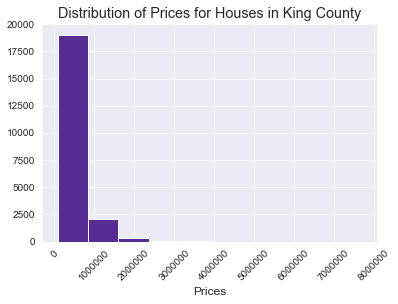

In [6]:
# sns.distplot(df['price'])
df['price'].hist()
plt.title('Distribution of Prices for Houses in King County', fontsize='x-large')
plt.xticks(rotation='45')
plt.xlabel('Prices', fontsize='large')
plt.show()

This made it clear that while most dwellings were below 1,000,000, there were some that were incredibly expensive. We were interested in the trends among the majorit of the population, and the incredible inequality these creatures seem to willingly endure had to be eliminated from our data so we could see the greater mass of them. 

We did this by cutting off the top %2.6 of the high prices. We also normalized the data by performing a log transformation.

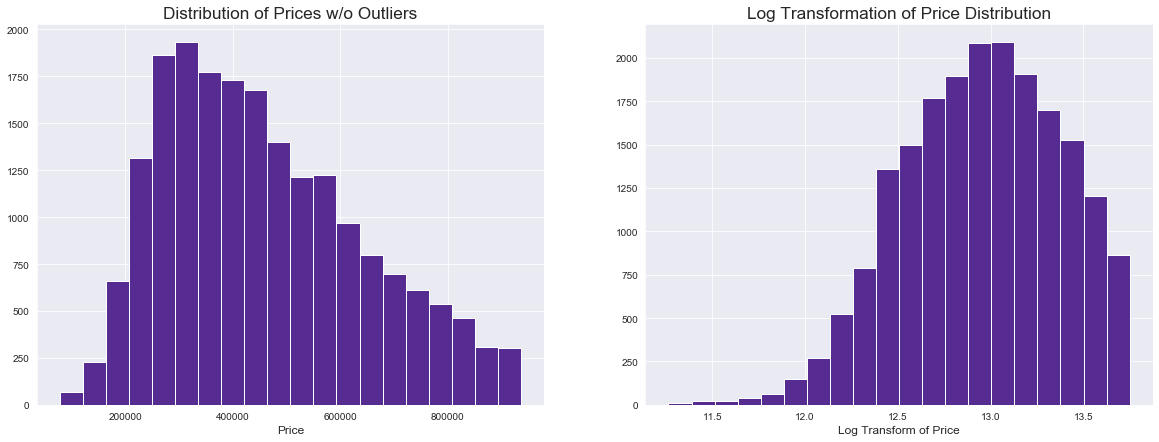

In [8]:
df = df.drop(df.loc[df['price'] > np.mean(df['price']) + (2 * np.std(df['price']))].index)
df['price_log'] = df['price'].map(lambda x: np.log(x))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.hist(df['price'], bins=20)
ax2.hist(df['price_log'], bins=20)
ax1.set_title('Distribution of Prices w/o Outliers', fontsize='xx-large')
ax1.set_xlabel('Price', fontsize='large')
ax2.set_title('Log Transformation of Price Distribution', fontsize='xx-large')
ax2.set_xlabel('Log Transform of Price', fontsize='large')
plt.show()

Since the price of a home was to be our guide to what these aliens value, it was important that it be cleaned up nicely. With that done, we could turn to look at other features of our dataset. The first step here was to simply see how each feature correlated with others, so that we could identify those that might correlate well with the price. 

In [10]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.024435  0.012023   0.031341     0.015763 -0.134402   
price          0.024435  1.000000  0.277621   0.427166     0.588116  0.090860   
bedrooms       0.012023  0.277621  1.000000   0.484218     0.586812  0.022515   
bathrooms      0.031341  0.427166  0.484218   1.000000     0.706699  0.055887   
sqft_living    0.015763  0.588116  0.586812   0.706699     1.000000  0.152040   
sqft_lot      -0.134402  0.090860  0.022515   0.055887     0.152040  1.000000   
floors         0.033906  0.263547  0.148472   0.501311     0.331189 -0.021562   
waterfront    -0.009723  0.028342 -0.035184  -0.019014    -0.009642  0.008462   
view           0.017488  0.193229  0.023681   0.071351     0.140634  0.087255   
condition     -0.028734  0.028423  0.023960  -0.140742    -0.076611 -0.000025   
grade          0.042225  0.601172  0.306210   0.600453     0.682312  0.084040   
sqft_above     0.018801  0.497086  0.460879   0.626985     0.845615  0.156869   
yr_built       0.028303  0.061125  0.162013   0.556489     0.359147  0.037225   
yr_renovated  -0.013453  0.068367 -0.004095   0.012107     0.012013  0.011067   
zipcode       -0.006089 -0.014732 -0.149735  -0.214298    -0.211616 -0.130752   
lat            0.005835  0.450101 -0.040452  -0.024901    -0.011544 -0.099764   
long           0.021356  0.084130  0.141296   0.252228     0.292514  0.222709   
sqft_living15  0.018284  0.533495  0.364737   0.516000     0.726042  0.143924   
sqft_lot15    -0.145278  0.082787  0.019889   0.056959     0.167510  0.708526   
price_log      0.028624  0.971280  0.279368   0.439656     0.573461  0.086377   

                 floors  waterfront      view  condition     grade  \
id             0.033906   -0.009723  0.017488  -0.028734  0.042225   
price          0.263547    0.028342  0.193229   0.028423  0.601172   
bedrooms       0.148472   -0.035184  0.023681   0.023960  0.306210   
bathrooms      0.501311   -0.019014  0.071351  -0.140742  0.600453   
sqft_living    0.331189   -0.009642  0.140634  -0.076611  0.682312   
sqft_lot      -0.021562    0.008462  0.087255  -0.000025  0.084040   
floors         1.000000   -0.007163 -0.021105  -0.279995  0.455536   
waterfront    -0.007163    1.000000  0.234138   0.002926 -0.010681   
view          -0.021105    0.234138  1.000000   0.025424  0.104690   
condition     -0.279995    0.002926  0.025424   1.000000 -0.178920   
grade          0.455536   -0.010681  0.104690  -0.178920  1.000000   
sqft_above     0.526713   -0.019002  0.047552  -0.182115  0.689529   
yr_built       0.519543   -0.028773 -0.068308  -0.349190  0.506830   
yr_renovated  -0.008700    0.052323  0.044584  -0.053036 -0.022474   
zipcode       -0.068789    0.035424  0.098478  -0.006878 -0.190180   
lat            0.028698   -0.031415 -0.036853  -0.019418  0.068197   
long           0.138465   -0.053130 -0.072928  -0.095177  0.235315   
sqft_living15  0.264496    0.000704  0.158712  -0.128434  0.653782   
sqft_lot15    -0.025763    0.024985  0.085678   0.005393  0.096167   
price_log      0.275712    0.028476  0.180638   0.026418  0.593817   

               sqft_above  yr_built  yr_renovated   zipcode       lat  \
id               0.018801  0.028303     -0.013453 -0.006089  0.005835   
price            0.497086  0.061125      0.068367 -0.014732  0.450101   
bedrooms         0.460879  0.162013     -0.004095 -0.149735 -0.040452   
bathrooms        0.626985  0.556489      0.012107 -0.214298 -0.024901   
sqft_living      0.845615  0.359147      0.012013 -0.211616 -0.011544   
sqft_lot         0.156869  0.037225      0.011067 -0.130752 -0.099764   
floors           0.526713  0.519543     -0.008700 -0.068789  0.028698   
waterfront      -0.019002 -0.028773      0.052323  0.035424 -0.031415   
view             0.047552 -0.068308      0.044584  0.098478 -0.036853   
condition       -0.182115 -0.349190     -0.053036 -0.006878 -0.019418   
grade            0.689529  0.506830     -0.02

It seemed like the squarefootage of the living area, the grade given to it by a rating agency, and, oddly enough, the squarefootage of their neighbors were most correlated with the price. We looked at the square footage numbers, eliminated outliers, and log transformed them as well. The grade was strongly correlated with both of these, such that using it as well would yield a lot of multicollinearity. So we did not deal with the grade column as yet.

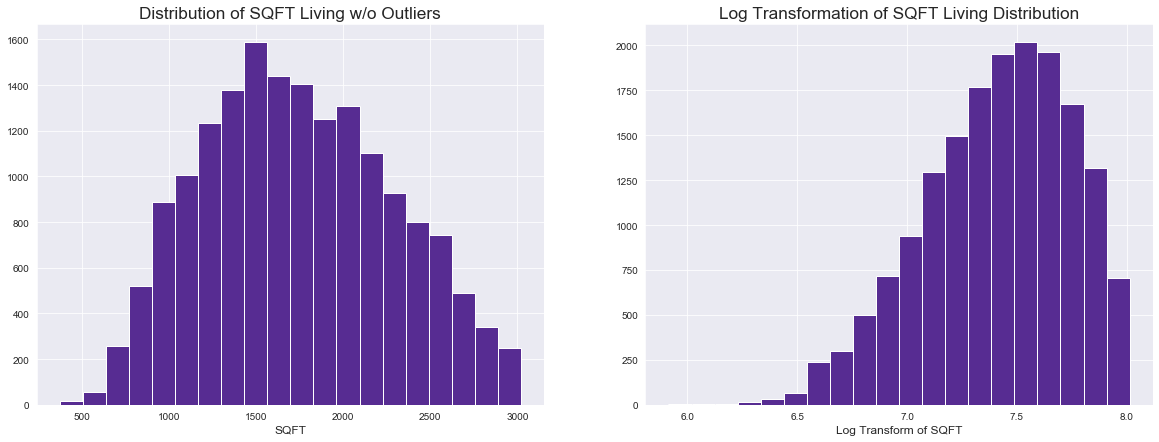

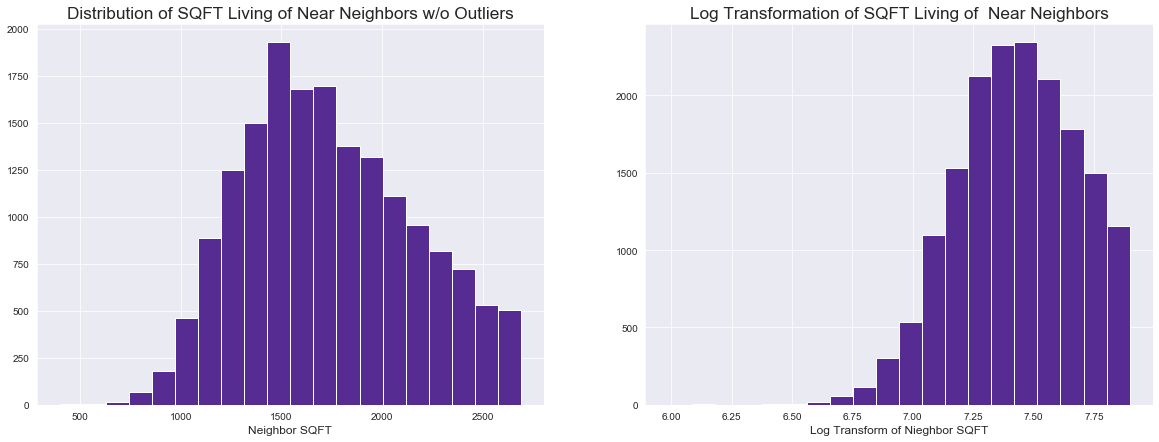

In [12]:
df = df.drop(df.loc[df['sqft_living'] > np.mean(df['sqft_living']) + (2 * np.std(df['sqft_living']))].index)
df = df.drop(df.loc[df['sqft_living15'] > np.mean(df['sqft_living15']) + (2 * np.std(df['sqft_living15']))].index)

df['sqft_living_log'] = df['sqft_living'].map(lambda x: np.log(x))
df['sqft_living15_log'] = df['sqft_living15'].map(lambda x: np.log(x))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.hist(df['sqft_living'], bins=20)
ax2.hist(df['sqft_living_log'], bins=20)
ax1.set_title('Distribution of SQFT Living w/o Outliers', fontsize='xx-large')
ax1.set_xlabel('SQFT', fontsize='large')
ax2.set_title('Log Transformation of SQFT Living Distribution', fontsize='xx-large')
ax2.set_xlabel('Log Transform of SQFT', fontsize='large')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.hist(df['sqft_living15'], bins=20)
ax2.hist(df['sqft_living15_log'], bins=20)
ax1.set_title('Distribution of SQFT Living of Near Neighbors w/o Outliers', fontsize='xx-large')
ax1.set_xlabel('Neighbor SQFT', fontsize='large')
ax2.set_title('Log Transformation of SQFT Living of  Near Neighbors', fontsize='xx-large')
ax2.set_xlabel('Log Transform of Nieghbor SQFT', fontsize='large')
plt.show()

At this point, we felt we had a good few indicators. But simply the size of their space would not tell us much about these humans' preferences. So we looked at our data and sculpted some more features. It seemed interesting, for example, to find out whether they liked to live below ground or instead favored living spaces high above the ground. We also tracked whether the house was newly remodelled, and how much empty space existed around it.

In [14]:
# making the basement column numeric, imputing 0 to unknown values humans tend to take any opportunity 
# to discuss their basements, so it is likely that if the basement is unheard of, it simply does not exist.
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

# making basement column categorical
df['has_basement'] = df['sqft_basement'].map(lambda x: 0 if x > 0 else 1)

# marking which houses had space high above the ground
df['high_floors'] = df['floors'].map(lambda x: 0 if x < 2 else 1)

# marking which houses have renovations
df['has_renovation'] = df['yr_renovated'].map(lambda x: 0 if x > 0 else 1)

# tracking empty lot space
df['surrounding_space'] = df['sqft_lot'] - (df['sqft_above'] / df['floors'])
df['surrounding_space_log'] = df['surrounding_space'].map(lambda x: np.log(x))

With the data thus organized, we were able to begin answering some of the questions raised by our Comission in the course of its investigations. In what follows, we will look at the questions below one by one:

1. Do humans prefer to live near water or to live more inland where it is safer?
2. Do humans like to have a lot of empty land around them?
3. Do humans like to live high above the ground?
4. Do humans enjoy living deep below the ground?
5. How important is the sense of sight to human beings?

To answer these, we make use of a many different columns in our data, while also tracking these features against the overall price of the home. 

### 1. Do Humans Prefer Living Near Water?

To answer this question, we will see what proportion of high-price homes are near water. If the proportion of high-price homes near water is higher than the proportion of low-price homes near water, this will tell us that humans enjoy the water and tend to pay extra for it. 

In [16]:
# first, split the price data into quartiles
first_q, second_q, third_q = df['price'].quantile([.25, .5, .75])
df['price_quartile'] = df['price'].map(lambda x: 1 if x < first_q 
                                                else 2 if first_q <= x < second_q 
                                                else 3 if second_q <= x < third_q 
                                                else 4)

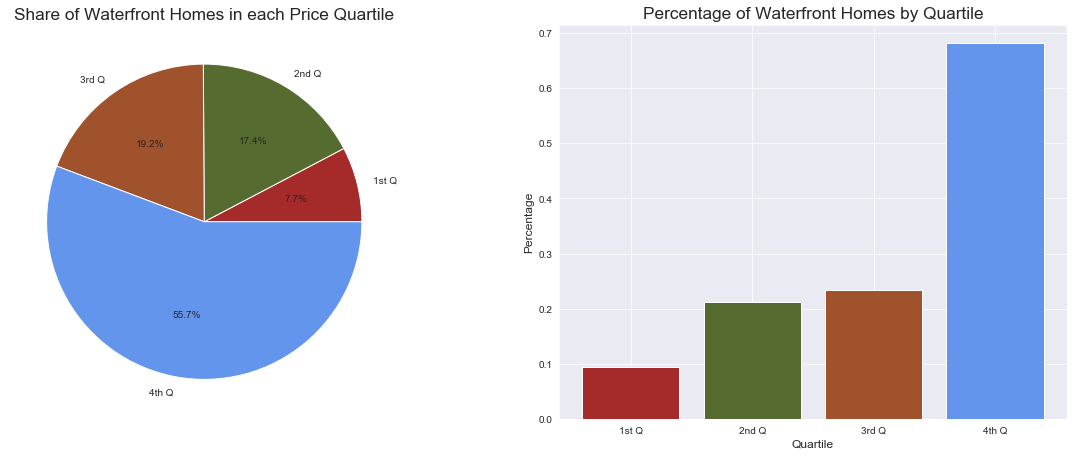

In [18]:
# make a dictionary of quartiles and the percentage of waterfront homes in that quartile
quartile_percent_waterfront = {}
for i in [1, 2, 3, 4]:
    quartile = df.loc[df['price_quartile'] == i]
    quartile_percent_waterfront[i] = (len(quartile.loc[df['waterfront'] == 1]) / len(quartile)) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7.25))
ax2 = plt.bar(x=quartile_percent_waterfront.keys(), height=quartile_percent_waterfront.values(), tick_label=['1st Q', '2nd Q', '3rd Q', '4th Q'], color=['brown', 'darkolivegreen', 'sienna','cornflowerblue'])
plt.title('Percentage of Waterfront Homes by Quartile', fontsize='xx-large')
plt.xlabel('Quartile', fontsize='large')
plt.ylabel('Percentage', fontsize='large')
ax1.pie(quartile_percent_waterfront.values(), labels=['1st Q', '2nd Q', '3rd Q', '4th Q'], colors=['brown', 'darkolivegreen', 'sienna','cornflowerblue'], autopct='%1.1f%%')
ax1.set_title('Share of Waterfront Homes in each Price Quartile', fontsize='xx-large')
plt.show()

From this, we can see that the vast majority of houses near water are valued quite highly by these creatures. This is odd given how dangerous and volatile liquid water is. Perhaps the humans have some sort of risk-seeking tendencies still remaining in their genetic sequences. 

Unfortunately for them (though perhaps fortunately for their race), not many homes can actually exist by the water (only about .35% of them). The homes that do, however, are highly sought after.

### 2. Do Humans Enjoy Having Empty Land Around Them?

Here we compare the empty space in a dwelling-place's lot to the price of the dwelling itself. But before looking at that connection itself, look at the distribution of surrounding space in general. 

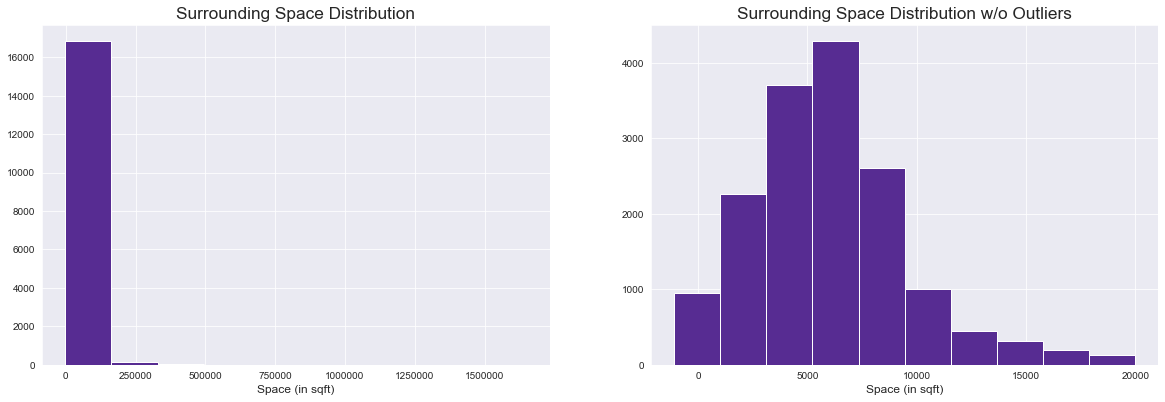

The average amount of space surrounding a home is 6042 sqft


In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6.25))
ax1.hist(df['surrounding_space'])
ax1.set_xlabel('Space (in sqft)', fontsize='large')
ax1.set_title('Surrounding Space Distribution', fontsize='xx-large')
df2 = df.drop(df.loc[df['surrounding_space'] > 20000].index)
ax2.hist(df2['surrounding_space'])
ax2.set_title('Surrounding Space Distribution w/o Outliers', fontsize='xx-large')
ax2.set_xlabel('Space (in sqft)', fontsize='large')
plt.show()

print('The average amount of space surrounding a home is ' + str(round(df2['surrounding_space'].mean())) + ' sqft')

As is evident, just as was the case with prices, there are a few houses with an enormous surrounding space. Once we control for those, however, we can get a clearer picture. It seems that most humans live with about 5000 sqft of surrounding space around their homes. Note however, that this distribution occured after we excluded many of the high-priced dwellings, so we already have a hint that large space does not correspond with large prices.

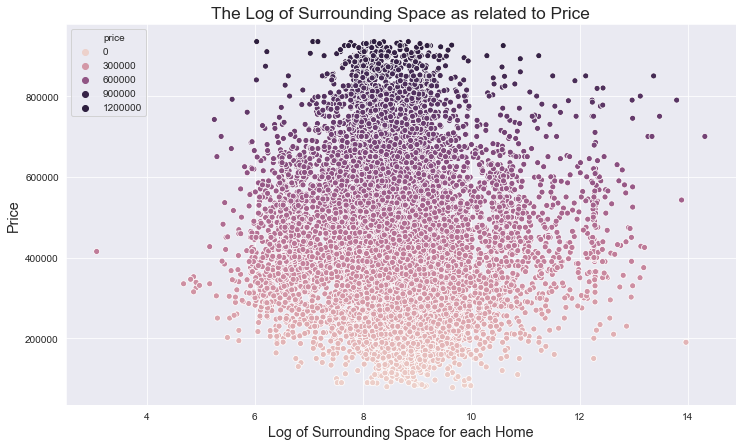

In [22]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(data=df, x='surrounding_space_log', y='price', hue='price')
ax.set_title('The Log of Surrounding Space as related to Price', fontsize='xx-large')
ax.set_xlabel('Log of Surrounding Space for each Home', fontsize='x-large')
ax.set_ylabel('Price', fontsize='x-large')
plt.show()

As is visible from the very clustered but also blob-esque data, there is no real connection between the price of a home and surrounding space. Humans do not value extra space around their homes enough to pay extra for it at any significant rate. 

### 3. Do Humans Like to Live High Above Ground?

This question is closely related to the question regarding the human desire to be near water. In their homes, these creatures have taken the art of stacking living spaces to great heights (pardon the pun). Again in an illustration of their desire for risk, or perhaps as a residual instinct from their days as tree-dwelling primates, they often build dwellings that tower over the ground with no regard for safety. 

Below we examine how much a human is willing to expend their finite resources in order to procure a home of great height. Height here is measured in floors - a tall home is one with more than two floors.

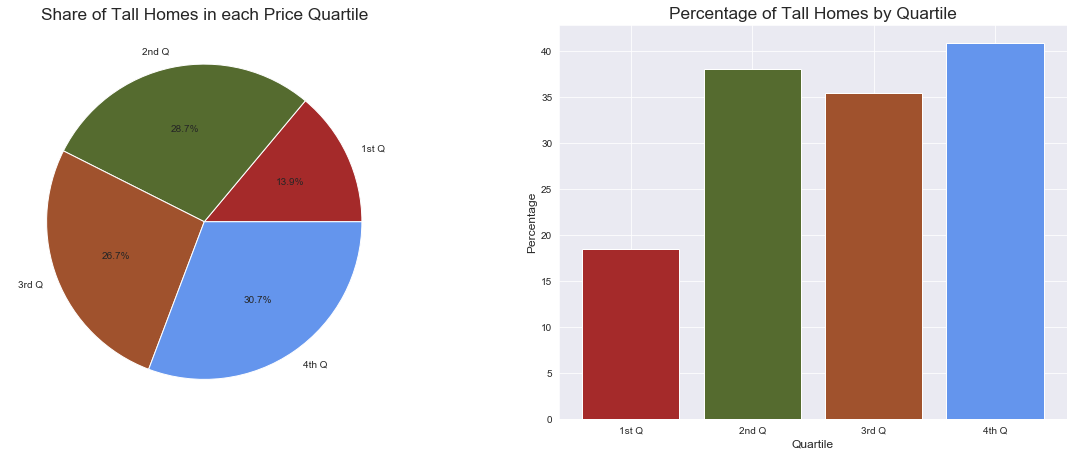

In [24]:
quartile_percent_floors = {}
for i in [1, 2, 3, 4]:
    quartile = df.loc[df['price_quartile'] == i]
    quartile_percent_floors[i] = (len(quartile.loc[df['high_floors'] == 1]) / len(quartile)) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7.25))
ax2 = plt.bar(x=quartile_percent_floors.keys(), height=quartile_percent_floors.values(), tick_label=['1st Q', '2nd Q', '3rd Q', '4th Q'], color=['brown', 'darkolivegreen', 'sienna','cornflowerblue'])
plt.title('Percentage of Tall Homes by Quartile', fontsize='xx-large')
plt.xlabel('Quartile', fontsize='large')
plt.ylabel('Percentage', fontsize='large')
ax1.pie(quartile_percent_floors.values(), labels=['1st Q', '2nd Q', '3rd Q', '4th Q'], colors=['brown', 'darkolivegreen', 'sienna','cornflowerblue'], autopct='%1.1f%%')
ax1.set_title('Share of Tall Homes in each Price Quartile', fontsize='xx-large')
plt.show()

Here there is a less clear effect as there was in the case of waterfront properties. Clearly only those willing to spend relatively large amounts of resources are able to procure homes with multiple stories. The biggest difference comes in Indeed, as the price goes up, a greater and greater percentage of homes are blessed with multiple floors. Clearly, the most well-off humans must have a great subconscious desire to end their lives, no doubt because the extreme inequality of their position creates in them great resevoirs of guilt.

### 4. Do Humans Enjoy Living Deep Below the Ground?



### 5. How Important is the Sense of Sight to Humans?